In [7]:
%matplotlib inline

Here it is a mathematical definition of the leaky echo-state network and a description of my "dynamic-rotation" trick.

### Leaky Echo-State
The dynamical system is a recurrent network of leaky units with a sigmoidal output function:

$$
\begin{align}
\tau\dot{\mathbf{x}} &= -\mathbf{x} + \mathbf{W}\tanh\left(\mathbf{x}\right)
&&\mathbf{x} \in \mathbb{R}^N,  \mathbf{W} \in \mathbb{R}^{N\times N}
\end{align}
$$

The only constraint defining echo-state networks compared to other recurrent networks is:

$$
\begin{align}
1-\epsilon <  \rho\left(\mathbf{Wd}\right)  < 1 &&
\end{align}
$$

where $\mathbf{Wd}$ is the correction of the weight matrix accounting for leakyness

$$
\begin{align}
\mathbf{Wd} = \frac{\delta t}{\tau}\mathbf{W} + \left(1 - \frac{\delta t}{\tau}\right)I &&\\
\end{align}
$$

and $\rho\left(\mathbf{M}\right)$ si the spectral radius of the matrix 

$$
\begin{align}
\rho\left(\mathbf{M}\right) = \max_i\left(\left|\lambda^\mathbf{M}_i \right|\right)
\end{align}
$$

### Finding $\mathbf{W}$

Given the constraint above, we can find the weights with few steps:

1. **Init** $\mathbf{Wd}$ by sampling from $\mathcal{N}\left(0,1\right)$
    1. **Decompose** $\mathbf{Wd}$ $\ \ \ \ \ \ \rightarrow\ \ \ \ \ \ \ $ $\mathbf{Wd^+} = \frac{\mathbf{Wd}+\mathbf{Wd}^T}{2}\ \ \ $ and $\ \ \ \mathbf{Wd^{-}} = \frac{\mathbf{Wd}-\mathbf{Wd}^T}{2}$
    * **Recompose** $\mathbf{Wd}$ $\ \ \ \ \ \ \rightarrow\ \ \ \ \ \ \ $ $[\alpha\mathbf{Wd^{-}}$ + $(1-\alpha)\mathbf{Wd^{+}}]$
* **Estract** $\mathbf{W}$ from  $\mathbf{Wd}$ $\ \ \rightarrow\ \ \ \ \ \ \ $ 
$\mathbf{W} = \frac{\tau}{\delta t}\left(\mathbf{Wd} - \left(1 - \frac{\delta t}{\tau}\right)I  \right)$

Steps 1A and 1B are my "dynamic-rotation" trick. They are not part of the original algorithm

### The values of $\alpha$

The function demo() in the script [dynrot.py](dynrot.py) simulates the activation due to a sparse inpulsive input of ESN networks with different values of $\alpha$. 

The greater is $\alpha$, the greater is the variance of the real part of the eigenvalues of $\mathbf{W}$. Inversely, the variance of the imaginary part of the eigenvalues of $\mathbf{W}$ decreases as $\alpha$ increases. 

In the graphics below the trajectory defined by the first 3 principal components of the time-series of the activations of units is also shown.

>Note that the spectral radius of the weight matrix is scaled by $\frac{\delta t}{\tau}$ and shifted by $-\frac{\delta t}{\tau}\left(1 - \frac{\delta t}{\tau}\right)$ on the real axis due to the leakyness correction.

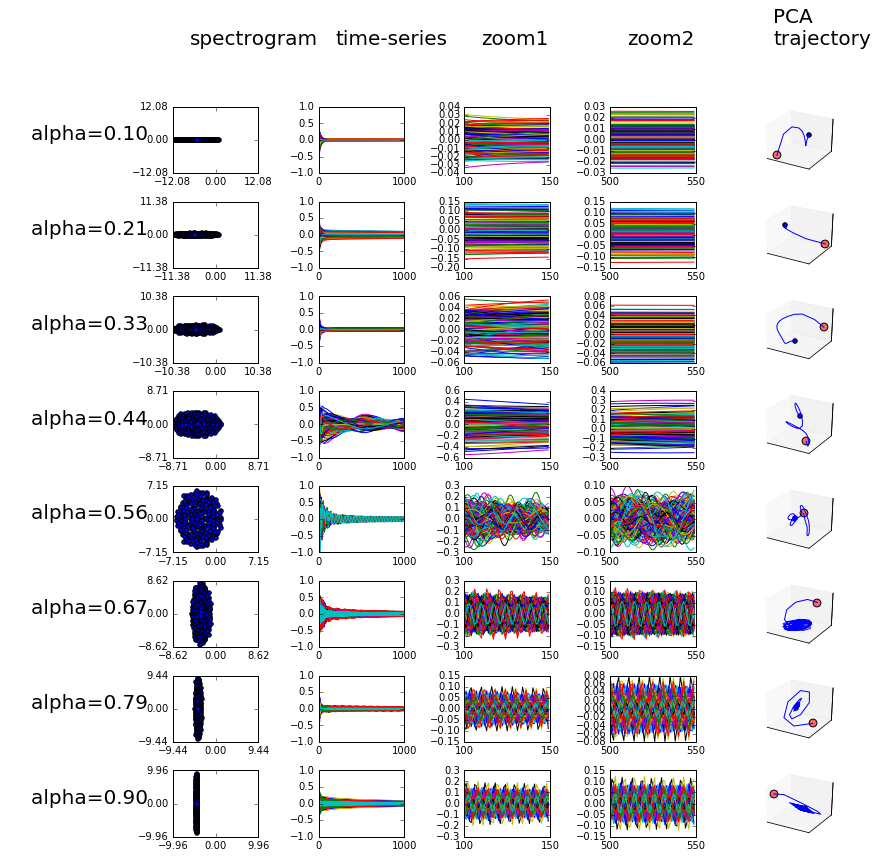

In [8]:
import  dynrot 
dynrot.demo()